# Neural Networks :
***Problem statement :*** 
- Predicting turbine energy yield (TEY) using ambient variables as features.
- The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
- The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.


**Attribute Information :**

- The explanations of sensor measurements and their brief statistics are given below.

    - Variable (Abbr.) Unit Min Max Mean
    - Ambient temperature (AT) C â€“6.23 37.10 17.71
    - Ambient pressure (AP) mbar 985.85 1036.56 1013.07
    - Ambient humidity (AH) (%) 24.08 100.20 77.87
    - Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
    - Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
    - Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
    - Turbine after temperature (TAT) C 511.04 550.61 546.16
    - Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
    - Turbine energy yield (TEY) MWH 100.02 179.50 133.51
    - Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
    - Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
# Importing usefull libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

# Ignore anoying warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading given dataset
df = pd.read_csv("gas_turbines.csv")

# Showing first 5 rows from given dataset
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
# Dimensions of given dataset
df.shape

(15039, 11)

In [4]:
# Summary of given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
# Looking for null values
df.isna().any().any()

False

In [6]:
# Basic stats 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


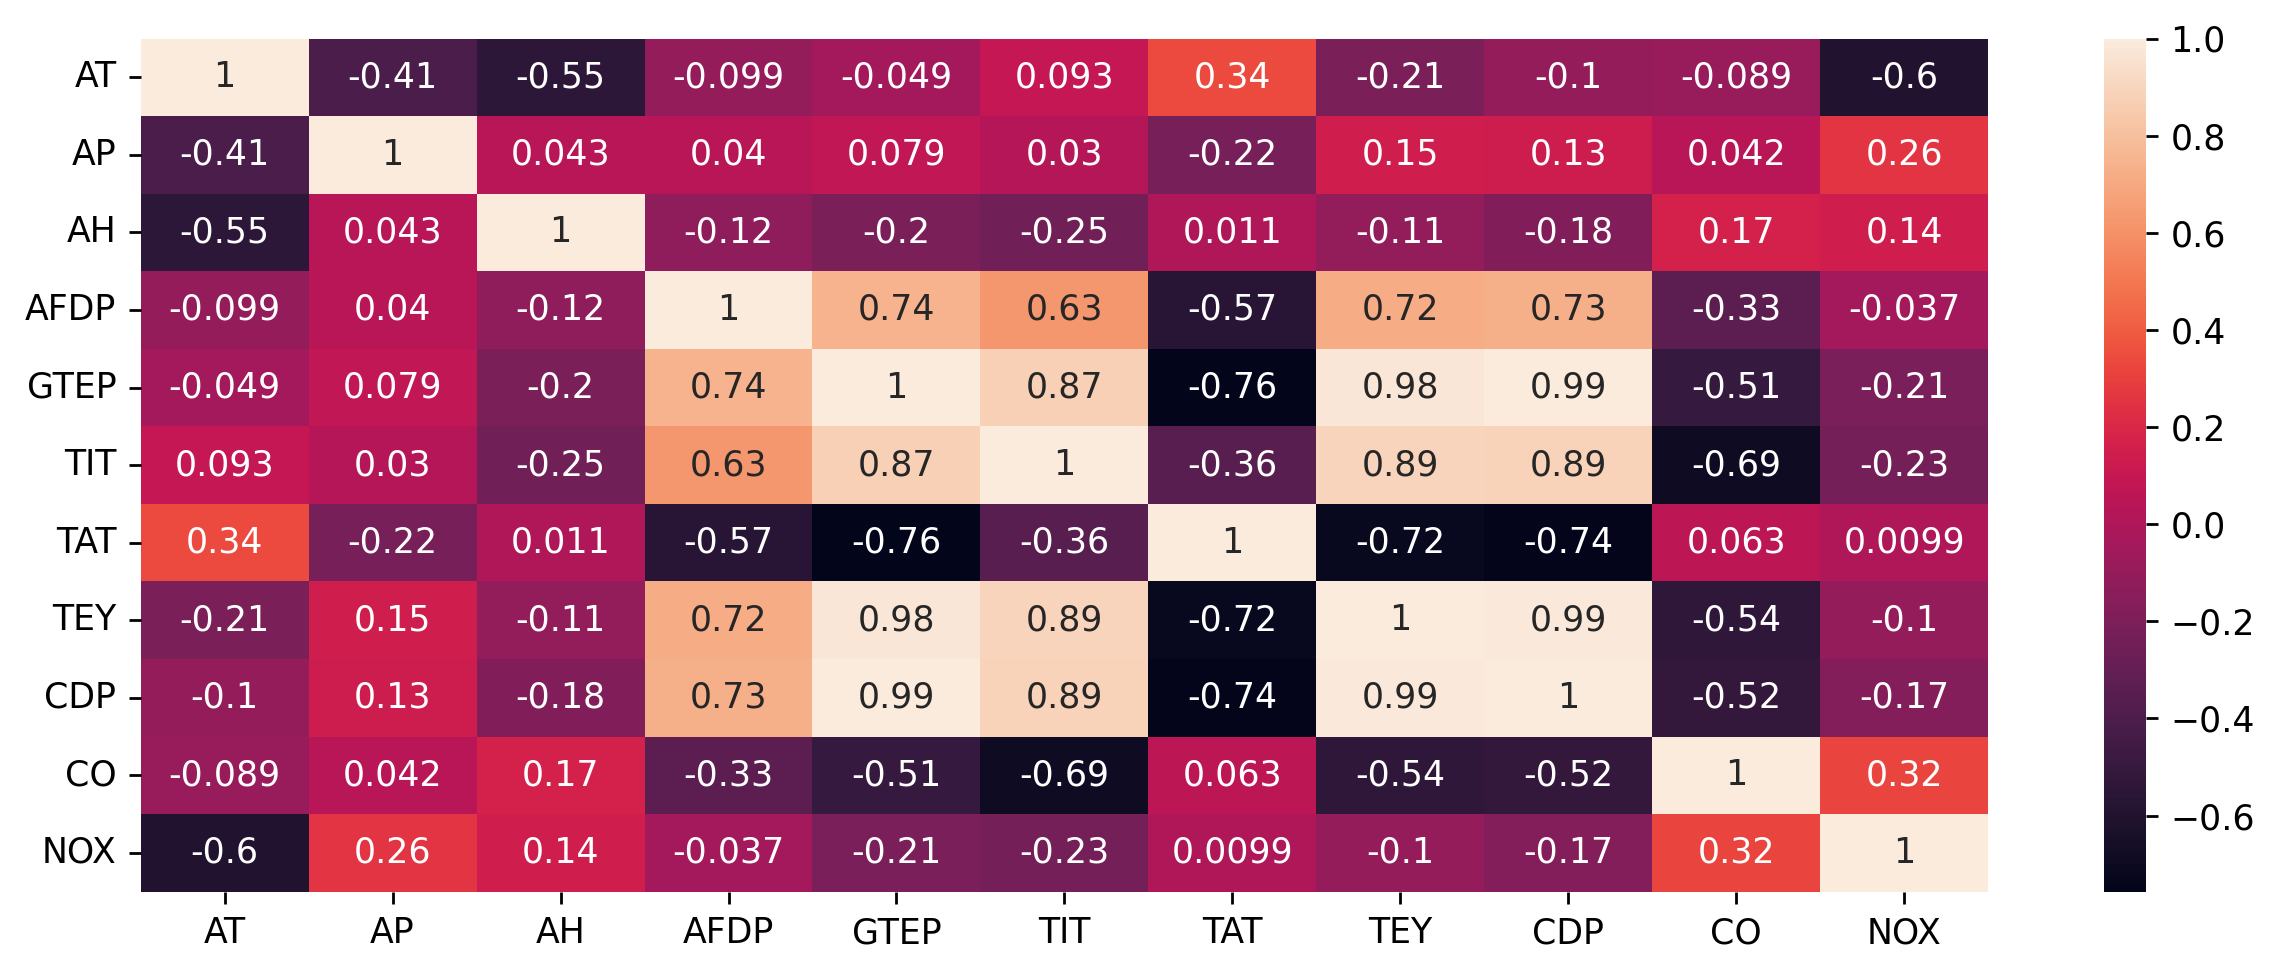

In [26]:
# Correlation matrix
plt.figure(figsize=(10,4),dpi=250)
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()
plt.show()

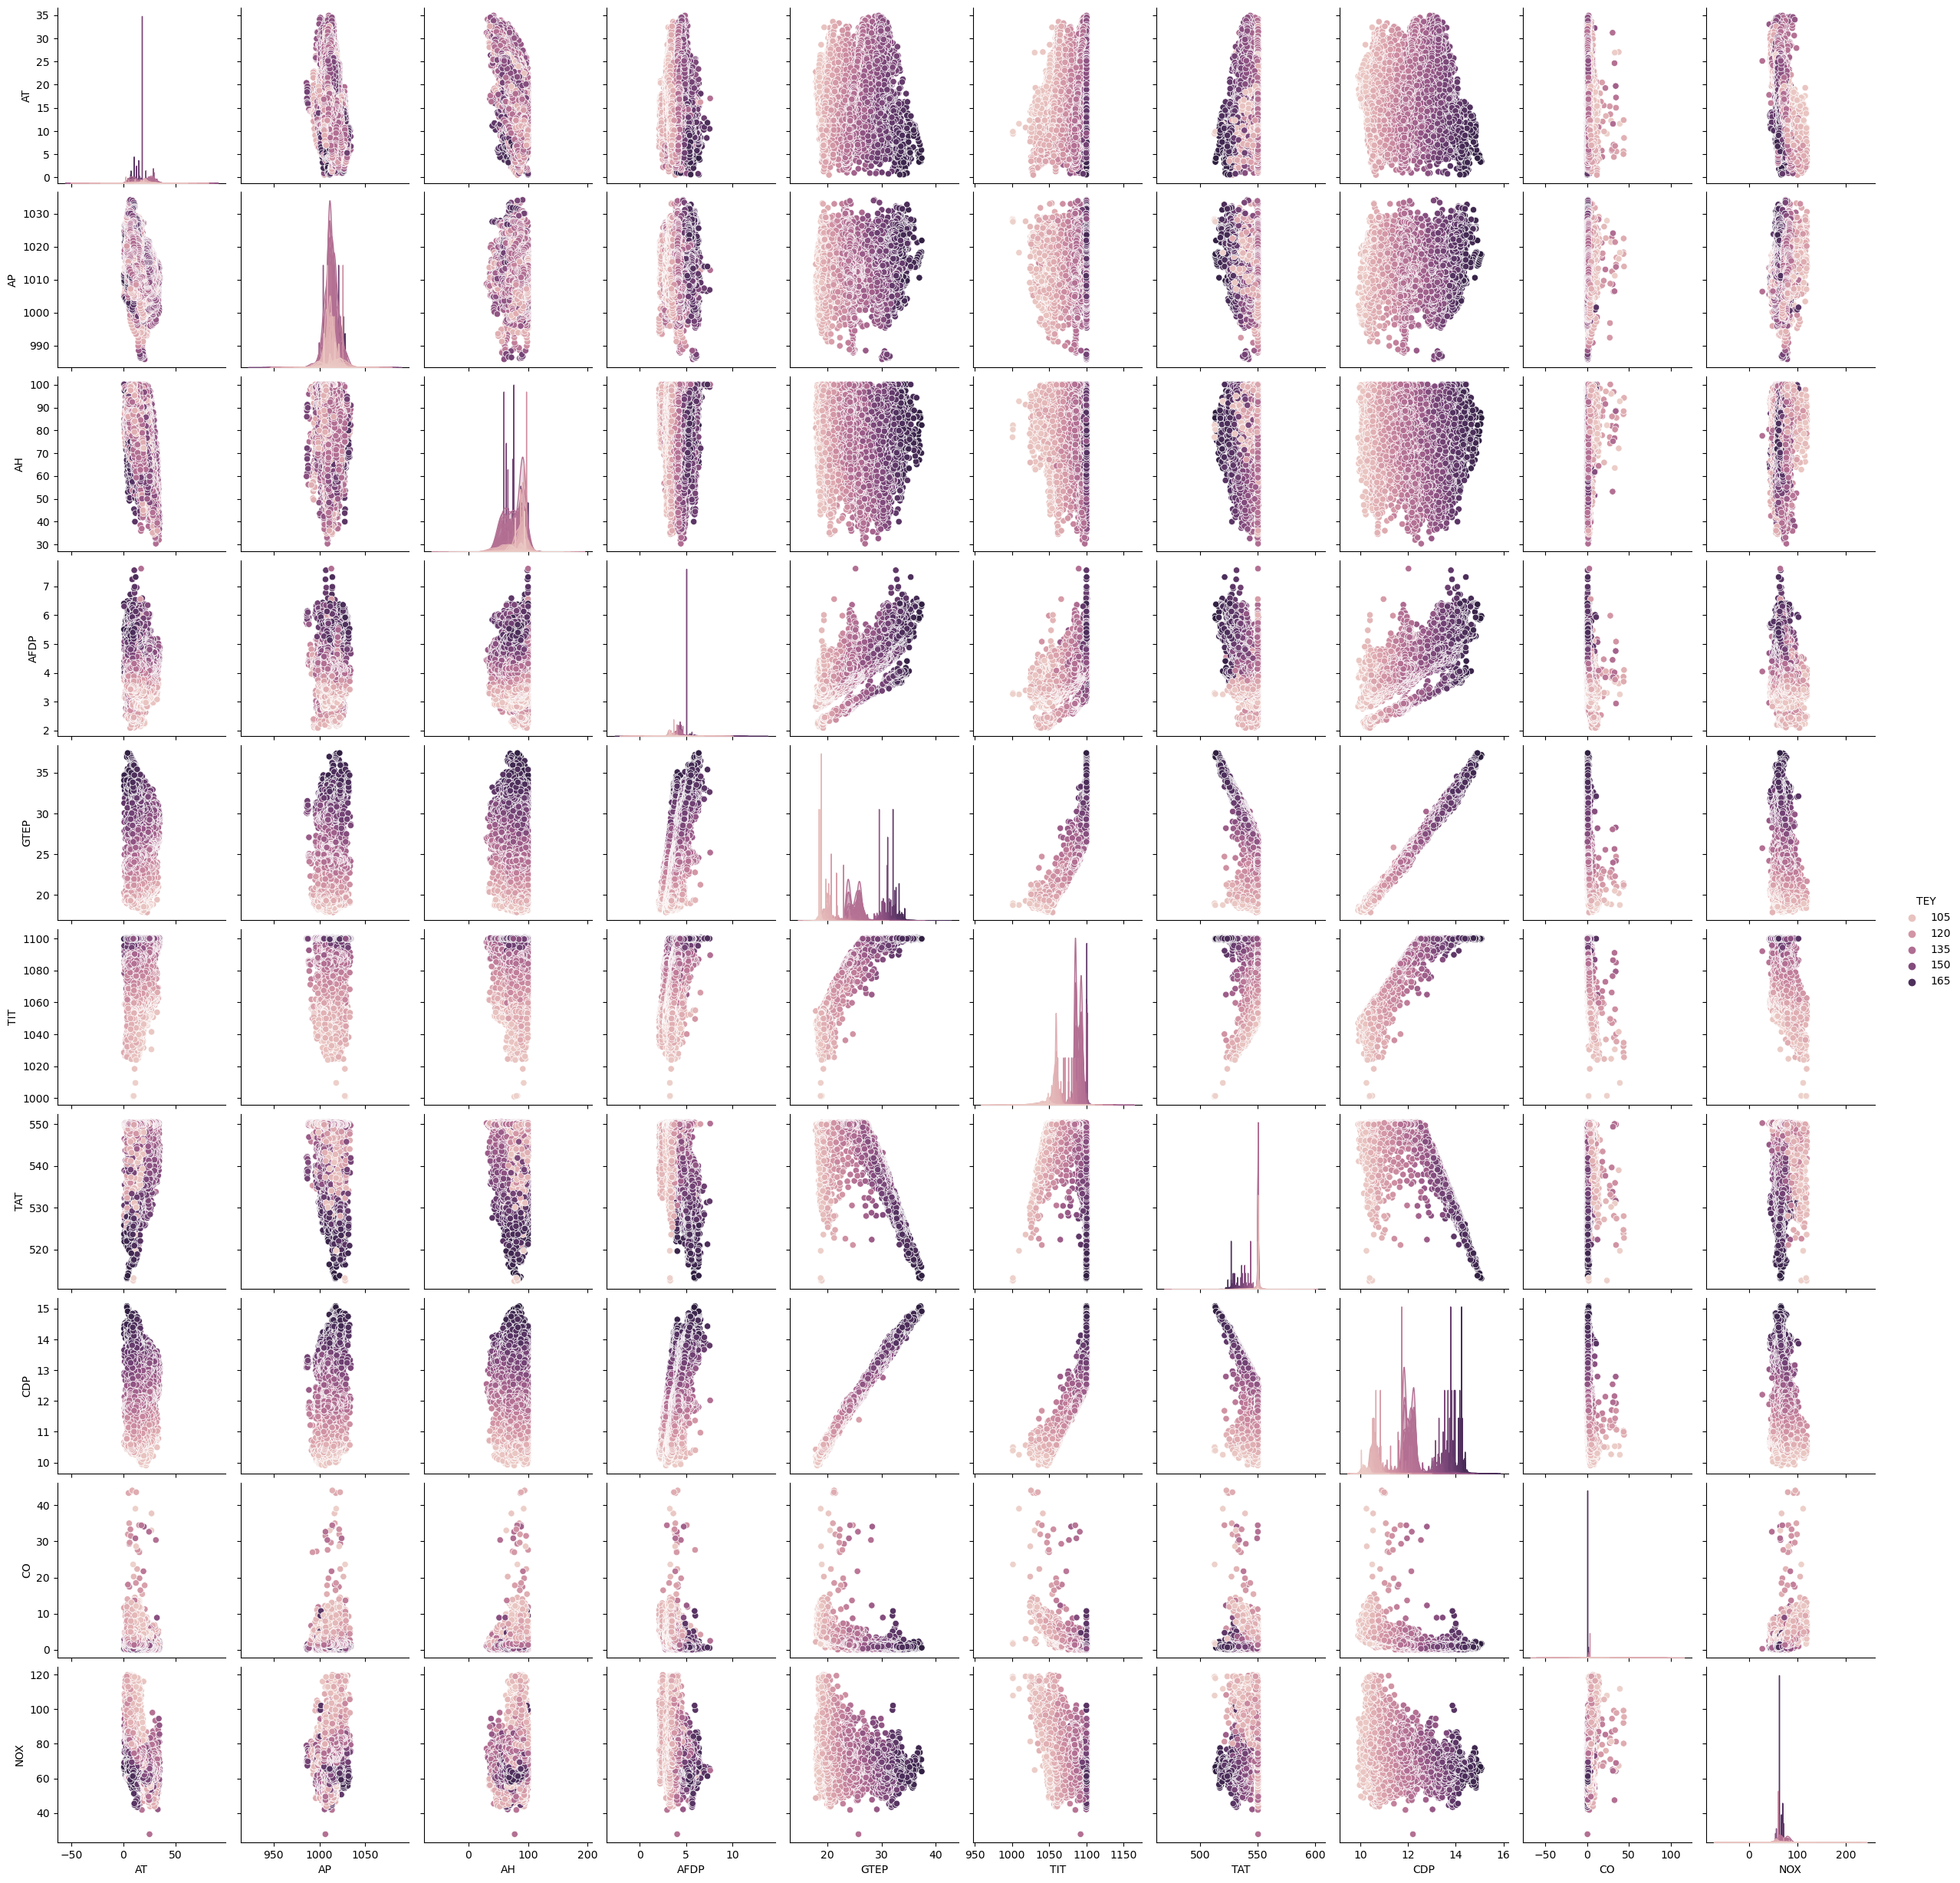

In [24]:
# Plotting pairwise relationship between "TEY" column & every columns
sns.pairplot(data=df, hue="TEY")
plt.show()

**Model Building :**

In [9]:
# Splitting dataset into features (x) & target (y)
x = df.drop(columns=['TEY'], axis=1).values
y = df['TEY'].values

In [12]:
# Splitting dataset into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
# Standardizing the data
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [15]:
# Model building
model = Sequential()

# Adding first layer
model.add(Dense(units=32, activation='relu', input_shape=(xtrain.shape[1],)))

# Adding second layer
model.add(Dense(units=16,activation='relu'))

# Adding third layer
model.add(Dense(units=1))

# Establish the connection between layers
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# training the model
history = model.fit(xtrain, ytrain, epochs=100, batch_size=32, validation_data=(xtest,ytest))

Epoch 1/100
376/376 [==============================] - 1s 2ms/step - loss: 9269.1230 - val_loss: 1188.9886
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 545.6053 - val_loss: 279.0956
Epoch 3/100
376/376 [==============================] - 0s 1ms/step - loss: 227.7381 - val_loss: 165.2631
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 145.6885 - val_loss: 114.4591
Epoch 5/100
376/376 [==============================] - 0s 1ms/step - loss: 104.1160 - val_loss: 84.9697
Epoch 6/100
376/376 [==============================] - 1s 1ms/step - loss: 77.4093 - val_loss: 64.1718
Epoch 7/100
376/376 [==============================] - 1s 1ms/step - loss: 58.8101 - val_loss: 49.1939
Epoch 8/100
376/376 [==============================] - 1s 1ms/step - loss: 44.5091 - val_loss: 37.2558
Epoch 9/100
376/376 [==============================] - 1s 2ms/step - loss: 32.9495 - val_loss: 27.8972
Epoch 10/100
376/376 [==============================] - 1s 1ms

376/376 [==============================] - 1s 1ms/step - loss: 0.4183 - val_loss: 0.5793
Epoch 82/100
376/376 [==============================] - 1s 1ms/step - loss: 0.4529 - val_loss: 0.7087
Epoch 83/100
376/376 [==============================] - 1s 2ms/step - loss: 0.4198 - val_loss: 0.5302
Epoch 84/100
376/376 [==============================] - 1s 2ms/step - loss: 0.4092 - val_loss: 0.5662
Epoch 85/100
376/376 [==============================] - 0s 1ms/step - loss: 0.4125 - val_loss: 0.5974
Epoch 86/100
376/376 [==============================] - 1s 2ms/step - loss: 0.4226 - val_loss: 0.7362
Epoch 87/100
376/376 [==============================] - 0s 1ms/step - loss: 0.4151 - val_loss: 0.5436
Epoch 88/100
376/376 [==============================] - 0s 1ms/step - loss: 0.4487 - val_loss: 0.6320
Epoch 89/100
376/376 [==============================] - 0s 1ms/step - loss: 0.4084 - val_loss: 0.6461
Epoch 90/100
376/376 [==============================] - 1s 1ms/step - loss: 0.4106 - val_loss: 

**Evaluating the model :**

In [17]:
# Calculating the loss value & metrics values for the model in test mode.
test_loss = model.evaluate(xtest,ytest)
print("Test Loss :", test_loss)

94/94 [==============================] - 0s 1ms/step - loss: 0.8178
Test Loss : 0.8178326487541199


In [28]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

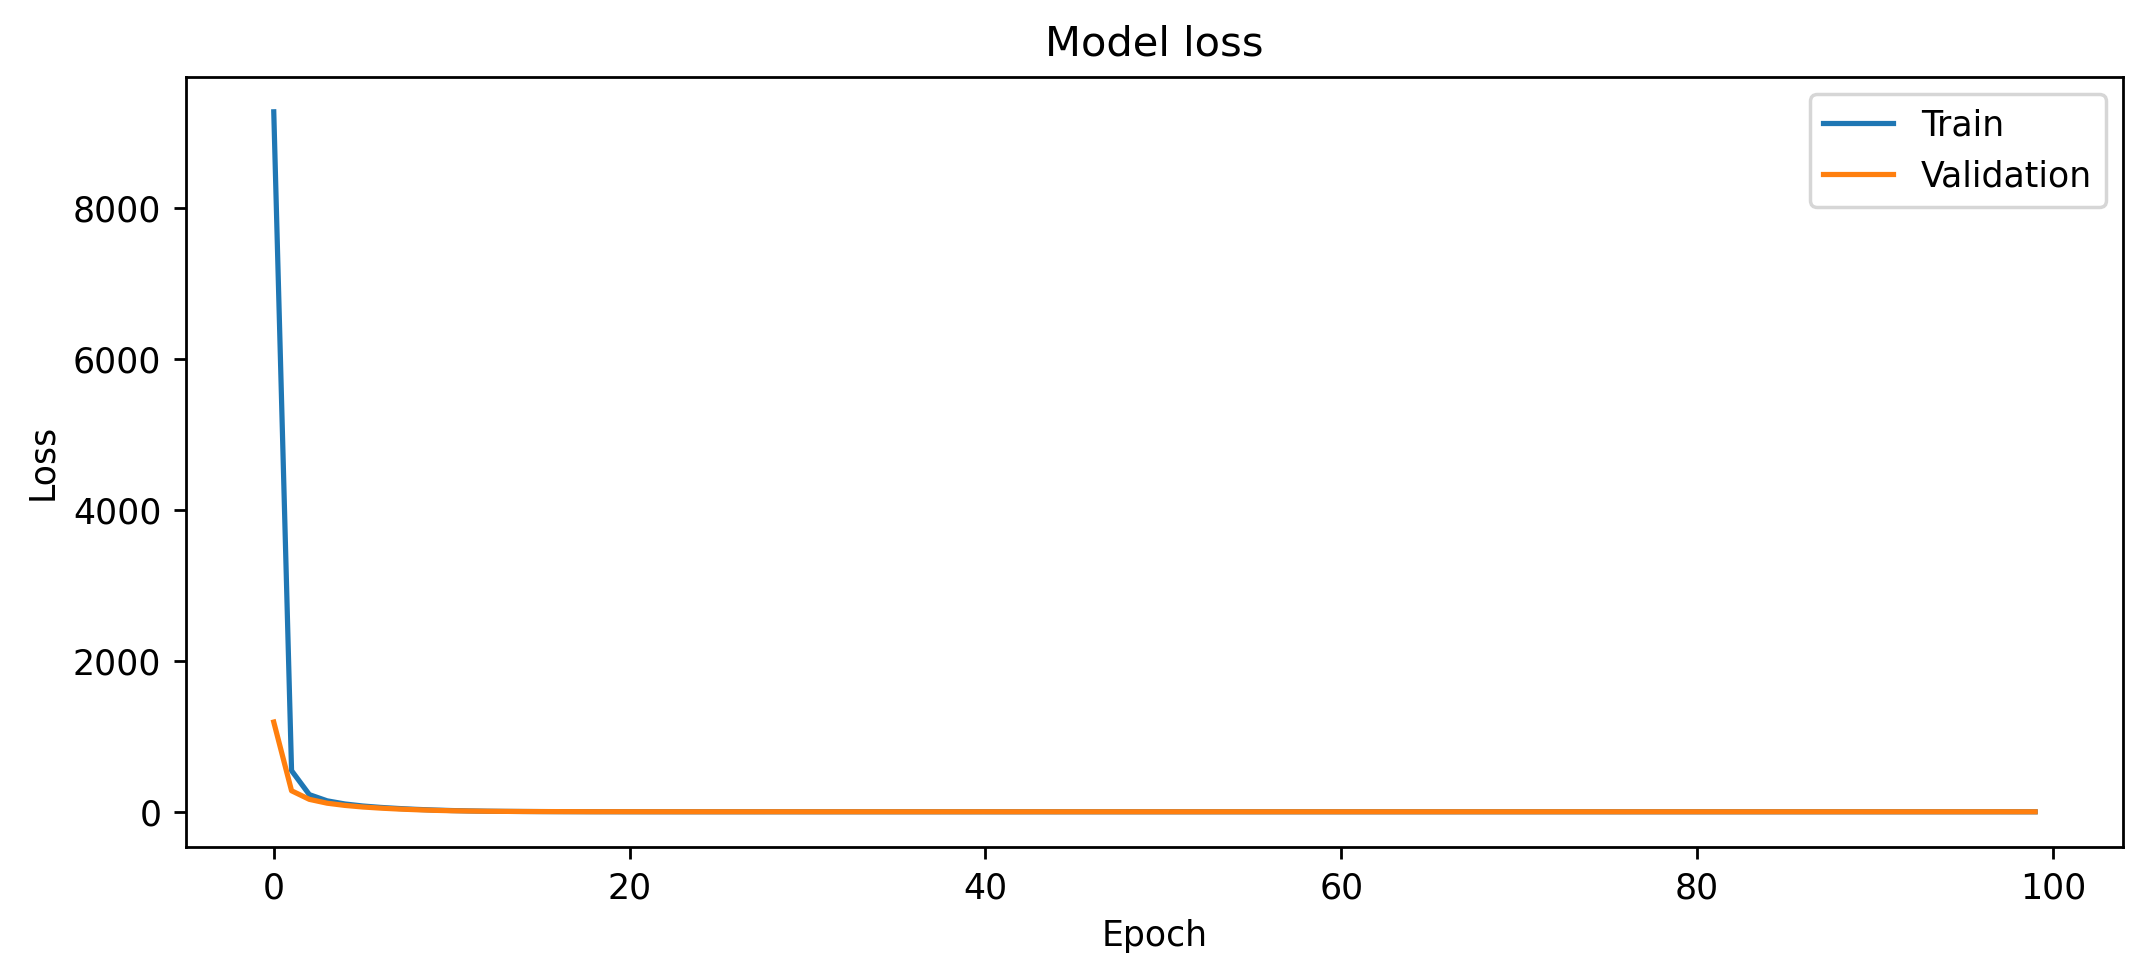

In [27]:
# Visualizing the training and validation loss
plt.figure(figsize=(10,4),dpi=250)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()